<a href="https://colab.research.google.com/github/AJITHKANNAN/Loan_Default_pred/blob/main/TR_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Case Study for Loan Default prediction

Step 1: Problem Understanding:

Predict whether a loan will default based on various attributes.

\

Step 2: Data Loading: Load the provided dataset into a Pandas DataFrame.

\

Step 3: Exploratory Data Analysis (EDA):

Perform EDA to understand the dataset's distributions.

Visualize the distribution of the target variable (Loan Status).

Explore relationships between different features and the target variable.

Use statistical tests or visualizations to understand the significance of
different features.

\

Step 4: Data Preprocessing

Handle missing values and outliers.

Encode categorical variables.

Check for data skewness and apply appropriate transformations.

Explore and address any data imbalances.

\
Step 5: Train-Test Split

Split the dataset into training and testing sets.

\
Step 6: Model Selection

Choosing some supervised learning methods

\
Step 7: Model Training

Train the selected models on the training data.

\
Step 8: Hyperparameter Tuning

If needed, perform hyperparameter tuning using techniques like GridSearchCV.

\
Step 9: Model Evaluation

Assess the performance of the models using appropriate metrics (accuracy, precision, recall, F1-score).
Discuss which model is considered best and why.

\
Step 10: Business Explanation

Provide a clear explanation in plain English of the business problem, outcomes, and insights gained.

\
Step 11: Documentation

Document the entire process in a Jupyter notebook or a Word document with explanations, code, and visualizations.

\
Step 12: Thank You Note

 Include a thank-you note to the recruiter team for the opportunity.


In [47]:
# Importing necessary Libraries

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
df_train = pd.read_csv('/content/drive/MyDrive/data/train.csv')

df_train.shape

(67563, 35)

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67563 entries, 0 to 67562
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67563 non-null  int64  
 1   Loan Amount                   66443 non-null  float64
 2   Funded Amount                 67563 non-null  int64  
 3   Funded Amount Investor        67563 non-null  float64
 4   Term                          66683 non-null  float64
 5   Batch Enrolled                67563 non-null  object 
 6   Interest Rate                 67563 non-null  float64
 7   Grade                         67563 non-null  object 
 8   Sub Grade                     67563 non-null  object 
 9   Home Ownership                67563 non-null  object 
 10  Employment Duration           67563 non-null  float64
 11  Verification Status           67563 non-null  object 
 12  Payment Plan                  67563 non-null  object 
 13  L

In [51]:
df_test = pd.read_csv('/content/drive/MyDrive/data/test.csv')

df_test.shape

(29013, 35)

In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29013 entries, 0 to 29012
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            29013 non-null  int64  
 1   Loan Amount                   28550 non-null  float64
 2   Funded Amount                 29013 non-null  int64  
 3   Funded Amount Investor        29013 non-null  float64
 4   Term                          28668 non-null  float64
 5   Batch Enrolled                29013 non-null  object 
 6   Interest Rate                 29013 non-null  float64
 7   Grade                         29013 non-null  object 
 8   Sub Grade                     29013 non-null  object 
 9   Home Ownership                29013 non-null  object 
 10  Employment Duration           29013 non-null  float64
 11  Verification Status           29013 non-null  object 
 12  Payment Plan                  29013 non-null  object 
 13  L

# Data Preprocessing


# Renaming column names for convenience

In [53]:
# Renaming column names for convenience

replace_columns = {

 'Loan Amount': 'Loan_Amount',
 'Funded Amount': 'Funded_Amount',
 'Funded Amount Investor': 'Funded_Amount_Investor',
 'Batch Enrolled': 'Batch_Enrolled',
 'Interest Rate': 'Interest_Rate',
 'Sub Grade': 'Sub_Grade',
 'Home Ownership': 'Home_Ownership',
 'Employment Duration': 'Employment_Duration',
 'Verification Status': 'Verification_Status',
 'Payment Plan': 'Payment_Plan',
 'Loan Title': 'Loan_Title',
 'Debit to Income': 'Debit_to_Income',
 'Delinquency - two years': 'Delinquency_two_years',
 'Inquires - six months': 'Inquires_six_months',
 'Open Account': 'Open_Account',
 'Public Record': 'Public_Record',
 'Revolving Balance': 'Revolving_Balance',
 'Revolving Utilities': 'Revolving_Utilities',
 'Total Accounts': 'Total_Accounts',
 'Initial List Status': 'Initial_List_Status',
 'Total Received Interest': 'Total_Received_Interest',
 'Total Received Late Fee': 'Total_Received_Late_Fee',
 'Collection Recovery Fee': 'Collection_Recovery_Fee',
 'Collection 12 months Medical': 'Collection_12_months_Medical',
 'Application Type': 'Application_Type',
 'Last week Pay': 'Last_week_Pay',
 'Accounts Delinquent': 'Accounts_Delinquent',
 'Total Collection Amount': 'Total_Collection_Amount',
 'Total Current Balance': 'Total_Current_Balance',
 'Total Revolving Credit Limit': 'Total_Revolving_Credit_Limit',
 'Loan Status': 'Loan_Status'
}


# Rename columns in both training and test datasets
df_train.rename(columns = replace_columns, inplace=True)
df_test.rename(columns = replace_columns , inplace=True)

# Storing Length of both Train and Test data

Because after performing preprocessing we need to again split Train and Test data


In [54]:

train_len = len(df_train)
test_len = len(df_test)

In [55]:
print(train_len, ' ', test_len)

67563   29013


# Observation

Since both Test and train data has same columns, we combine both data and preprocess it simulataneously

# Concatinating Both Train and Test data


In [56]:
df = pd.concat([df_train, df_test], axis = 0) # concate row wise

# Resetting index
df.reset_index(drop = True, inplace = True)

# It will drop the existing index and apply the changes in the new dataframe

In [57]:
df.shape

(96576, 35)

In [58]:
df.columns

Index(['ID', 'Loan_Amount', 'Funded_Amount', 'Funded_Amount_Investor', 'Term',
       'Batch_Enrolled', 'Interest_Rate', 'Grade', 'Sub_Grade',
       'Home_Ownership', 'Employment_Duration', 'Verification_Status',
       'Payment_Plan', 'Loan_Title', 'Debit_to_Income',
       'Delinquency_two_years', 'Inquires_six_months', 'Open_Account',
       'Public_Record', 'Revolving_Balance', 'Revolving_Utilities',
       'Total_Accounts', 'Initial_List_Status', 'Total_Received_Interest',
       'Total_Received_Late_Fee', 'Recoveries', 'Collection_Recovery_Fee',
       'Collection_12_months_Medical', 'Application_Type', 'Last_week_Pay',
       'Accounts_Delinquent', 'Total_Collection_Amount',
       'Total_Current_Balance', 'Total_Revolving_Credit_Limit', 'Loan_Status'],
      dtype='object')

In [59]:
df.head(3)

,ID,Loan_Amount,Funded_Amount,Funded_Amount_Investor,Term,Batch_Enrolled,Interest_Rate,Grade,Sub_Grade,Home_Ownership,...,Recoveries,Collection_Recovery_Fee,Collection_12_months_Medical,Application_Type,Last_week_Pay,Accounts_Delinquent,Total_Collection_Amount,Total_Current_Balance,Total_Revolving_Credit_Limit,Loan_Status
0,16554375,33018.0,11760,8911.377904,59.0,BAT1586599,16.200249,B,G1,MORTGAGE,...,0.040202,1.005686,0,INDIVIDUAL,2,0,50,48379,4599,0.0
1,16260670,NaN,25543,34092.731820,59.0,BAT1766061,11.592735,B,A4,RENT,...,5.249225,1.134362,0,INDIVIDUAL,24,0,582,211574,20791,0.0
2,38160762,16774.0,9717,7949.140886,58.0,BAT2803411,10.963143,B,B4,MORTGAGE,...,2.846310,1.554686,0,INDIVIDUAL,82,0,14,313080,25499,0.0


In [60]:
df.tail(3)

,ID,Loan_Amount,Funded_Amount,Funded_Amount_Investor,Term,Batch_Enrolled,Interest_Rate,Grade,Sub_Grade,Home_Ownership,...,Recoveries,Collection_Recovery_Fee,Collection_12_months_Medical,Application_Type,Last_week_Pay,Accounts_Delinquent,Total_Collection_Amount,Total_Current_Balance,Total_Revolving_Credit_Limit,Loan_Status
96573,4950551,32348.0,4681,23387.44532,59.0,BAT2252229,11.347281,C,C2,MORTGAGE,...,3.277516,1.152829,0,INDIVIDUAL,35,0,51,219908,43856,NaN
96574,2756676,21185.0,6750,12198.08511,59.0,BAT4694572,12.349347,D,A3,MORTGAGE,...,9.199395,1.376197,0,INDIVIDUAL,20,0,8,129411,5163,NaN
96575,15057927,11000.0,11000,11000.00000,36.0,BAT2522922,12.990000,B,B5,MORTGAGE,...,1340.620000,241.311600,0,INDIVIDUAL,65,0,0,68415,7200,NaN


# Preprocessing the dataframe

# 1) Finding Null Values

In [62]:
df.isna().sum()

ID                                  0
Loan_Amount                      1583
Funded_Amount                       0
Funded_Amount_Investor              0
Term                             1225
Batch_Enrolled                      0
Interest_Rate                       0
Grade                               0
Sub_Grade                           0
Home_Ownership                      0
Employment_Duration                 0
Verification_Status                 0
Payment_Plan                        0
Loan_Title                          0
Debit_to_Income                     0
Delinquency_two_years               0
Inquires_six_months                 0
Open_Account                        0
Public_Record                       0
Revolving_Balance                   0
Revolving_Utilities                 0
Total_Accounts                      0
Initial_List_Status                 0
Total_Received_Interest             0
Total_Received_Late_Fee             0
Recoveries                          0
Collection_R

# Observation:
Found that the columns 'Loan_Amount' and 'Term' having missing values and 'Loan_status'

The columns data object is Numeric, hence filling it with 'MEAN'

In [63]:
# Treating Null Values

df['Term'].fillna(df['Term'].mean(), inplace=True)
df['Loan_Amount'].fillna(df['Loan_Amount'].mean(), inplace=True)


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96576 entries, 0 to 96575
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            96576 non-null  int64  
 1   Loan_Amount                   96576 non-null  float64
 2   Funded_Amount                 96576 non-null  int64  
 3   Funded_Amount_Investor        96576 non-null  float64
 4   Term                          96576 non-null  float64
 5   Batch_Enrolled                96576 non-null  object 
 6   Interest_Rate                 96576 non-null  float64
 7   Grade                         96576 non-null  object 
 8   Sub_Grade                     96576 non-null  object 
 9   Home_Ownership                96576 non-null  object 
 10  Employment_Duration           96576 non-null  float64
 11  Verification_Status           96576 non-null  object 
 12  Payment_Plan                  96576 non-null  object 
 13  L

In [64]:
# Performing Value counts of each columns to find necessary columns

for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")

Column: ID
41269252    2
7145225     2
50187151    2
43391211    2
4966566     2
           ..
8521543     1
27022158    1
8215458     1
6668834     1
15057927    1
Name: ID, Length: 96376, dtype: int64


Column: Loan_Amount
16713.007674    1583
10000.000000     510
12000.000000     415
20000.000000     398
15000.000000     390
                ... 
8579.000000        1
2263.000000        1
17346.000000       1
1697.000000        1
32348.000000       1
Name: Loan_Amount, Length: 29627, dtype: int64


Column: Funded_Amount
10000    523
12000    418
20000    397
15000    396
35000    298
        ... 
21527      1
21478      1
26003      1
12993      1
32793      1
Name: Funded_Amount, Length: 26793, dtype: int64


Column: Funded_Amount_Investor
10000.000000    495
12000.000000    389
20000.000000    363
15000.000000    360
35000.000000    253
               ... 
6770.261067       1
12388.650620      1
16377.875230      1
13797.727950      1
12198.085110      1
Name: Funded_Amount_Investor

# 2) Removing some unwanted columns


In [65]:

df = df.drop (
    columns = [ 'ID', 'Batch_Enrolled', 'Grade','Sub_Grade', 'Loan_Title', 'Inquires_six_months', 'Public_Record',  # Not so important Columns
                'Collection_12_months_Medical',  # has less than 2% of category 1 remaining '0'
                'Application_Type',  # has less than 1% of category JOINT remaining 'Individual'
                'Payment_Plan',  # has only 1 category 'n'
                'Accounts_Delinquent',  # has only 28 datapoints in category '1' remaning all are '0'
                'Total_Received_Late_Fee', 'Collection_Recovery_Fee' # has the values only between 0 and 1
                   ])

In [66]:
df.columns

Index(['Loan_Amount', 'Funded_Amount', 'Funded_Amount_Investor', 'Term',
       'Interest_Rate', 'Home_Ownership', 'Employment_Duration',
       'Verification_Status', 'Debit_to_Income', 'Delinquency_two_years',
       'Open_Account', 'Revolving_Balance', 'Revolving_Utilities',
       'Total_Accounts', 'Initial_List_Status', 'Total_Received_Interest',
       'Recoveries', 'Last_week_Pay', 'Total_Collection_Amount',
       'Total_Current_Balance', 'Total_Revolving_Credit_Limit', 'Loan_Status'],
      dtype='object')

# Finding Categorical and Numerical values

In [67]:
numerical_columns = df.select_dtypes(exclude = 'object')
numerical_columns.head(2)


,Loan_Amount,Funded_Amount,Funded_Amount_Investor,Term,Interest_Rate,Employment_Duration,Debit_to_Income,Delinquency_two_years,Open_Account,Revolving_Balance,Revolving_Utilities,Total_Accounts,Total_Received_Interest,Recoveries,Last_week_Pay,Total_Collection_Amount,Total_Current_Balance,Total_Revolving_Credit_Limit,Loan_Status
0,33018.000000,11760,8911.377904,59.0,16.200249,67374.95410,25.780390,0,36,1670,56.114276,33,1719.768936,0.040202,2,50,48379,4599,0.0
1,16713.007674,25543,34092.731820,59.0,11.592735,25818.51668,24.154811,0,12,2659,53.242844,23,1367.617281,5.249225,24,582,211574,20791,0.0


In [68]:
categorical_columns = df.select_dtypes(include = 'object')
categorical_columns.head(2)

,Home_Ownership,Verification_Status,Initial_List_Status
0,MORTGAGE,Source Verified,f
1,RENT,Source Verified,f


# 3) Rounding off the columns having the float datatype for conveninence


In [69]:
df.Term = df.Term.astype(int)
df.Term.value_counts()

59    56199
58    28464
36     6892
60     3796
57     1225
Name: Term, dtype: int64

In [70]:
df[df.select_dtypes(include='float').columns].round(decimals=2)

,Loan_Amount,Funded_Amount_Investor,Interest_Rate,Employment_Duration,Debit_to_Income,Revolving_Utilities,Total_Received_Interest,Recoveries,Loan_Status
0,33018.00,8911.38,16.20,67374.95,25.78,56.11,1719.77,0.04,0.0
1,16713.01,34092.73,11.59,25818.52,24.15,53.24,1367.62,5.25,0.0
2,16774.00,7949.14,10.96,126202.82,23.46,67.01,2635.10,2.85,0.0
3,12977.00,10217.11,11.37,47273.49,13.16,37.74,1100.51,5.31,0.0
4,5937.00,13121.03,8.89,35144.68,19.85,45.80,453.53,4.13,1.0
...,...,...,...,...,...,...,...,...,...
96571,15043.00,15084.42,7.44,58771.48,25.10,24.66,2993.15,6.35,NaN
96572,15000.00,15000.00,18.49,39000.00,29.14,45.20,215.72,0.00,NaN
96573,32348.00,23387.45,11.35,58782.22,16.49,85.92,2835.82,3.28,NaN
96574,21185.00,12198.09,12.35,51044.88,19.27,19.51,1297.11,9.20,NaN


# Finding Distribution among the variables

# 1) Distribution of Target Variable Distribution


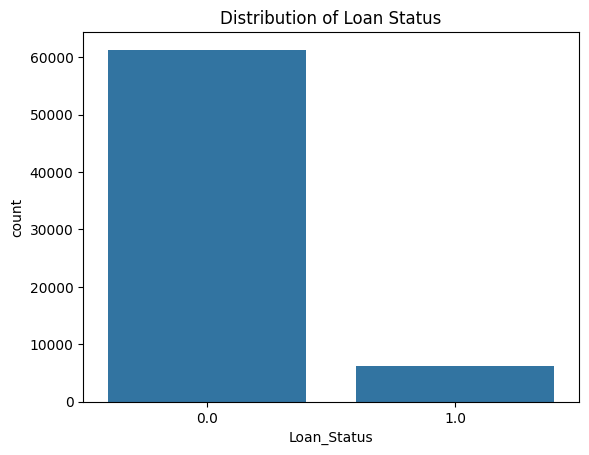

In [71]:
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribution of Loan Status')
plt.show()

#  Observation

From this distribution we can see that we have very minimal number of "Loan Default" which states many of them are paying their loans correctly and will not default

In preparing the model training we need to treat this Imbalance

# 2) Distribution of numerical data

In [72]:
numerical_columns

,Loan_Amount,Funded_Amount,Funded_Amount_Investor,Term,Interest_Rate,Employment_Duration,Debit_to_Income,Delinquency_two_years,Open_Account,Revolving_Balance,Revolving_Utilities,Total_Accounts,Total_Received_Interest,Recoveries,Last_week_Pay,Total_Collection_Amount,Total_Current_Balance,Total_Revolving_Credit_Limit,Loan_Status
0,33018.000000,11760,8911.377904,59.0,16.200249,67374.95410,25.780390,0,36,1670,56.114276,33,1719.768936,0.040202,2,50,48379,4599,0.0
1,16713.007674,25543,34092.731820,59.0,11.592735,25818.51668,24.154811,0,12,2659,53.242844,23,1367.617281,5.249225,24,582,211574,20791,0.0
2,16774.000000,9717,7949.140886,58.0,10.963143,126202.81660,23.457116,0,15,10290,67.009689,39,2635.095489,2.846310,82,14,313080,25499,0.0
3,12977.000000,32262,10217.109450,59.0,11.372651,47273.49080,13.156569,0,12,1364,37.743072,6,1100.507907,5.314602,129,42,98679,15270,0.0
4,5937.000000,22241,13121.033610,59.0,8.885435,35144.68346,19.846101,7,15,8739,45.797298,9,453.533367,4.131232,122,2036,501316,22000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96571,15043.000000,28663,15084.416130,58.0,7.435217,58771.48368,25.096344,0,13,4969,24.655425,30,2993.150199,6.350805,118,10,74143,14821,NaN
96572,15000.000000,15000,15000.000000,60.0,18.490000,39000.00000,29.140000,0,10,10218,45.200000,17,215.720000,0.000000,4,0,91434,22600,NaN
96573,32348.000000,4681,23387.445320,59.0,11.347281,58782.21710,16.486184,0,11,6159,85.915781,21,2835.820849,3.277516,35,51,219908,43856,NaN
96574,21185.000000,6750,12198.085110,59.0,12.349347,51044.88215,19.273694,0,13,295,19.508619,40,1297.108563,9.199395,20,8,129411,5163,NaN


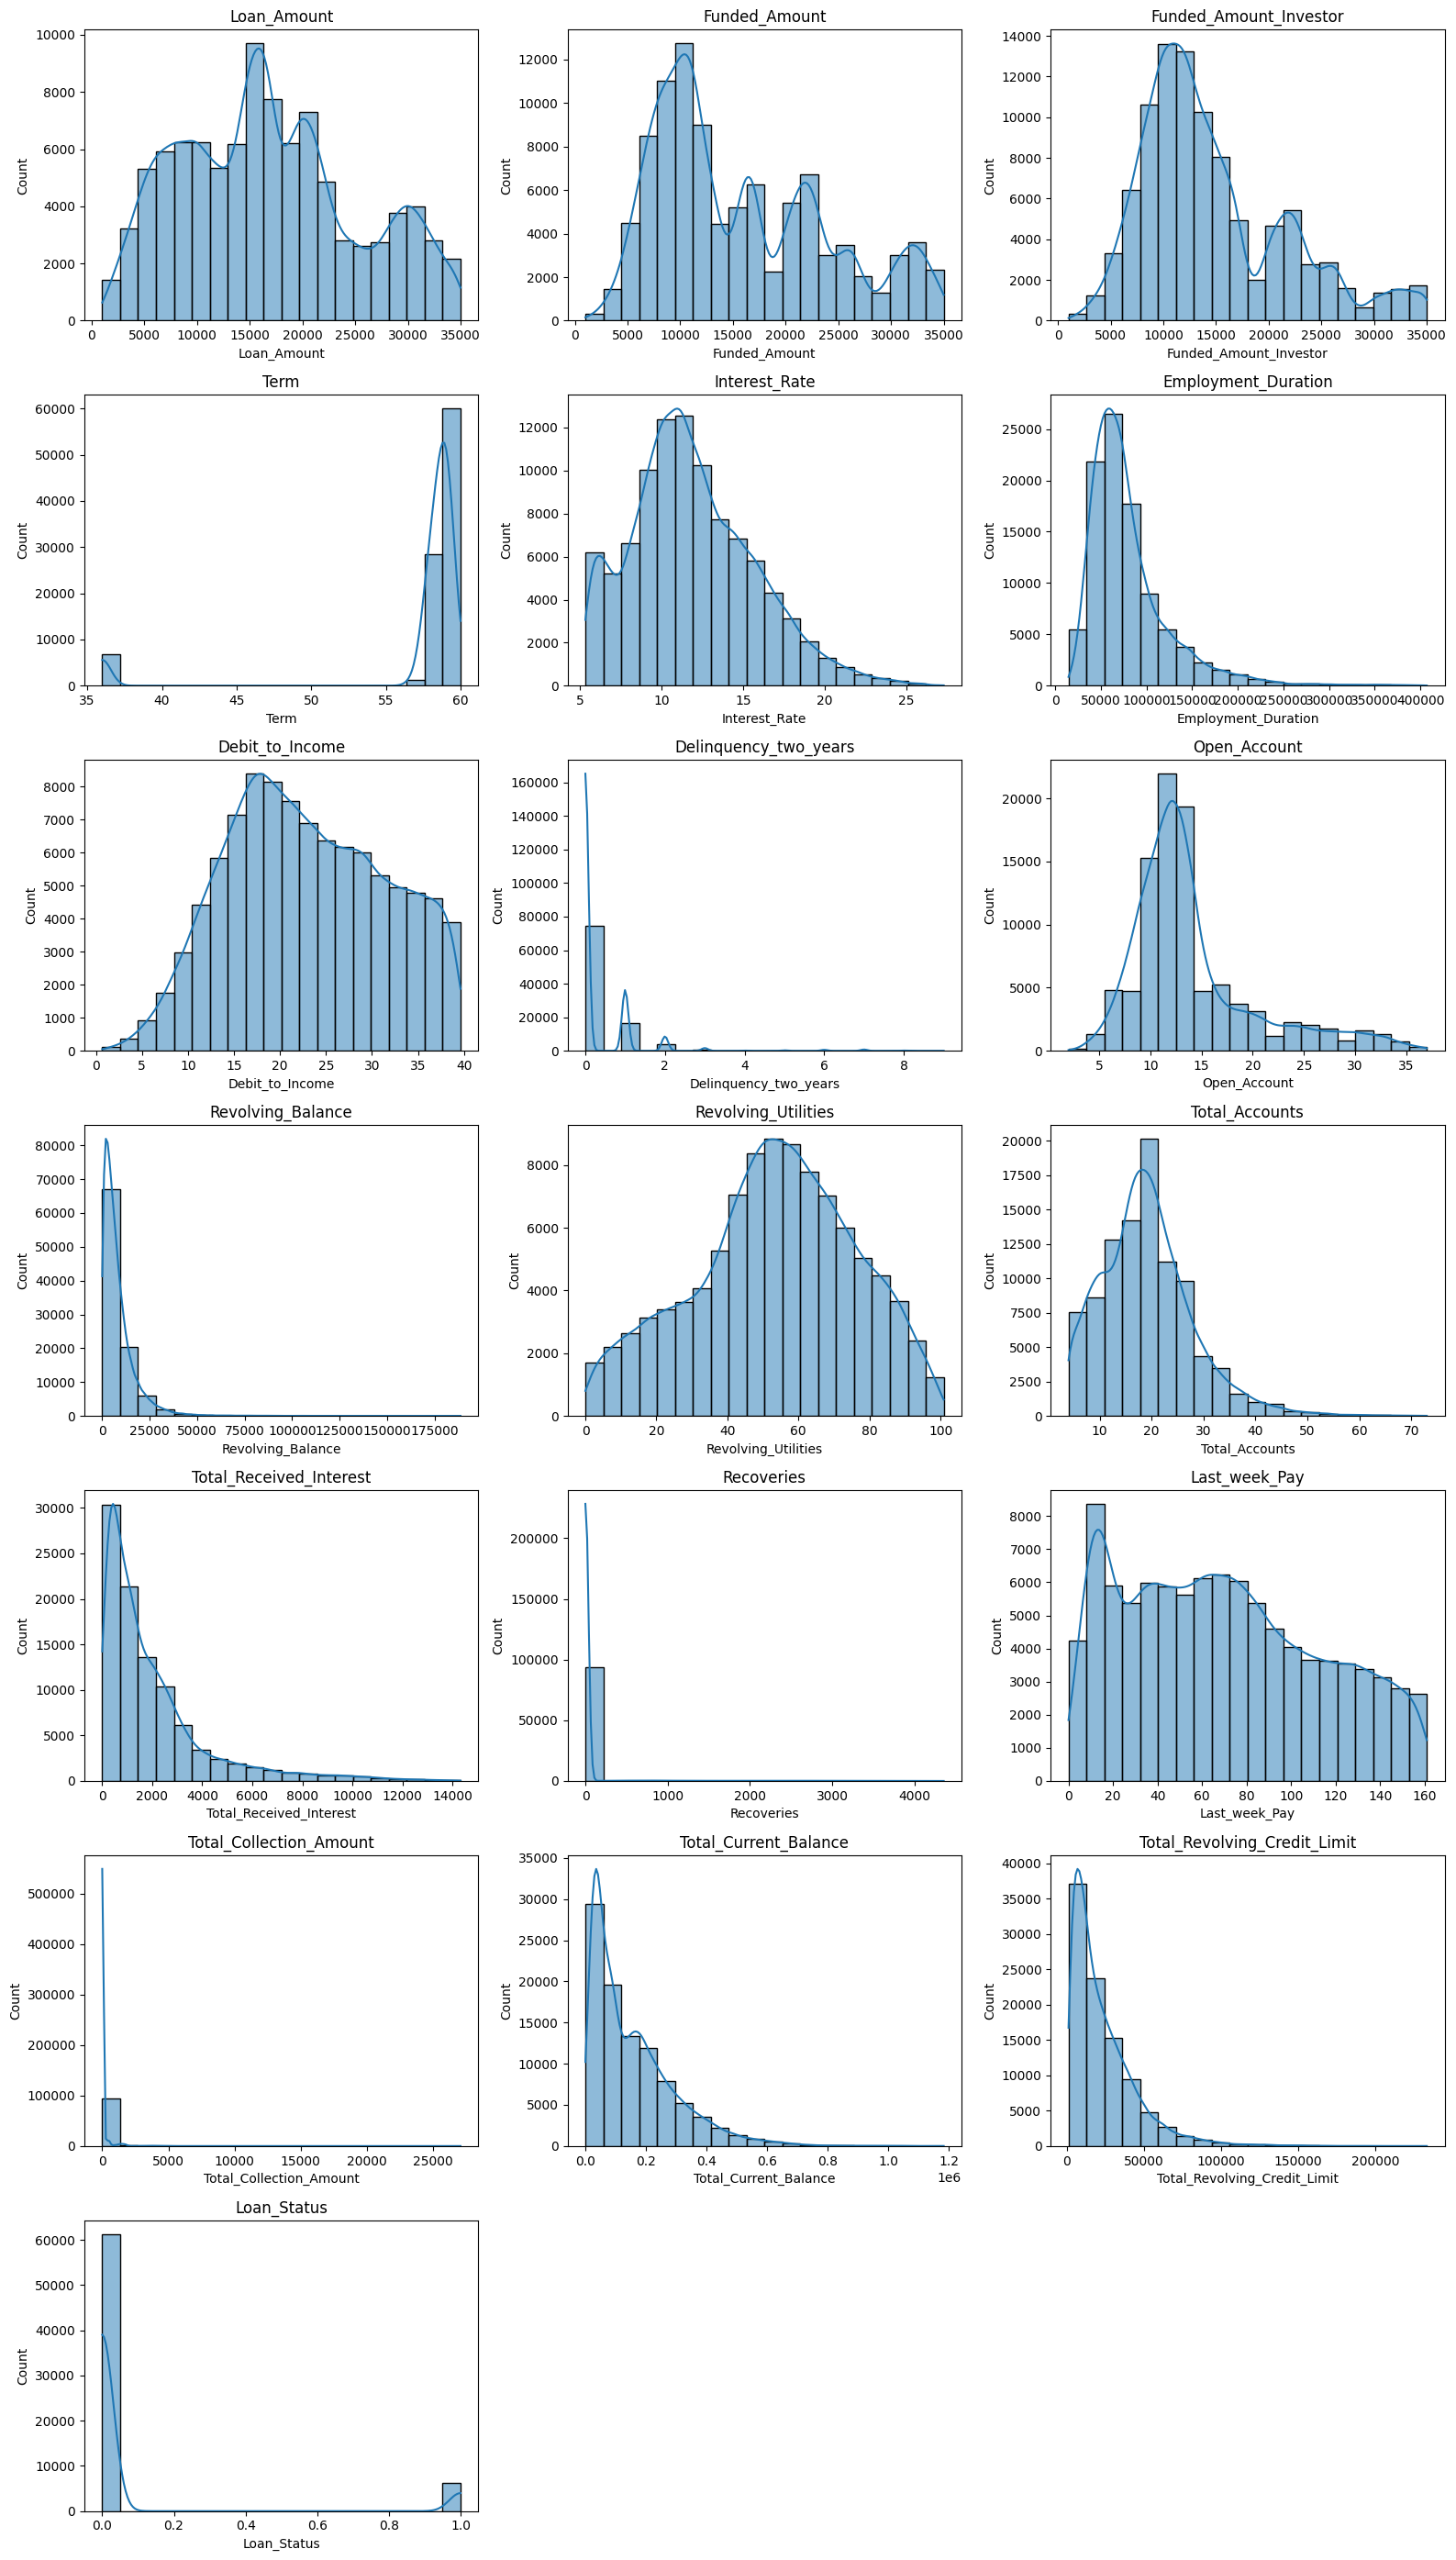

In [73]:

# Calculating the num of rows and columns to draw subplots
num_columns = len(numerical_columns.columns)
num_rows = (num_columns - 1) // 3 + 1

plt.figure(figsize=(16, num_rows * 4))

for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(numerical_columns[column], bins=20, kde=True)
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

# Observation
 Found that some of the columns are normally distributed and some are skewed

 We have normalize it accordingly

# Distribution of Categorical Features

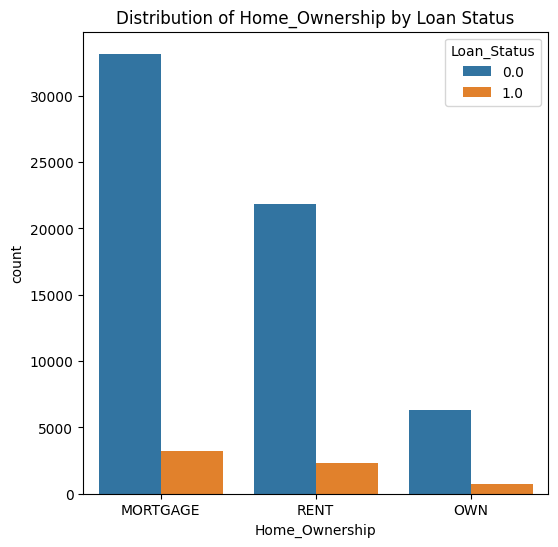

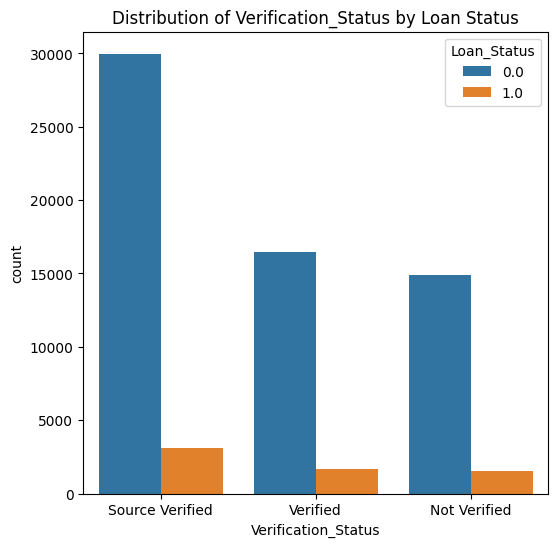

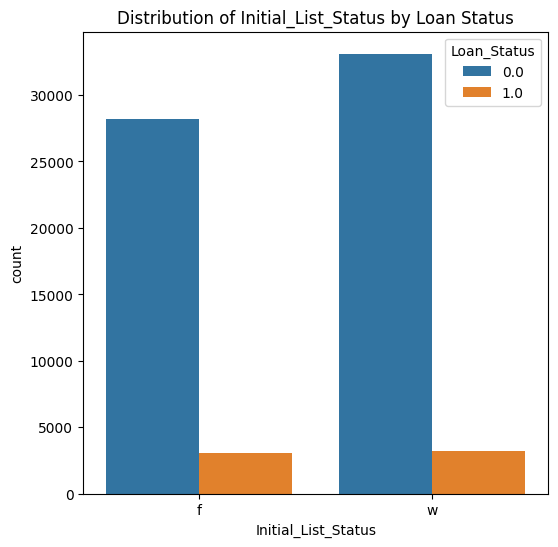

In [74]:
for feature in categorical_columns:
    plt.figure(figsize=(6, 6))
    sns.countplot(x=feature, data=df, hue='Loan_Status')
    plt.title(f'Distribution of {feature} by Loan Status')
    plt.show()

# Observation

In each categorical features, we found there were minimal number of Loan default status which was found by using Countplot

# Finding Corrrelation between variables

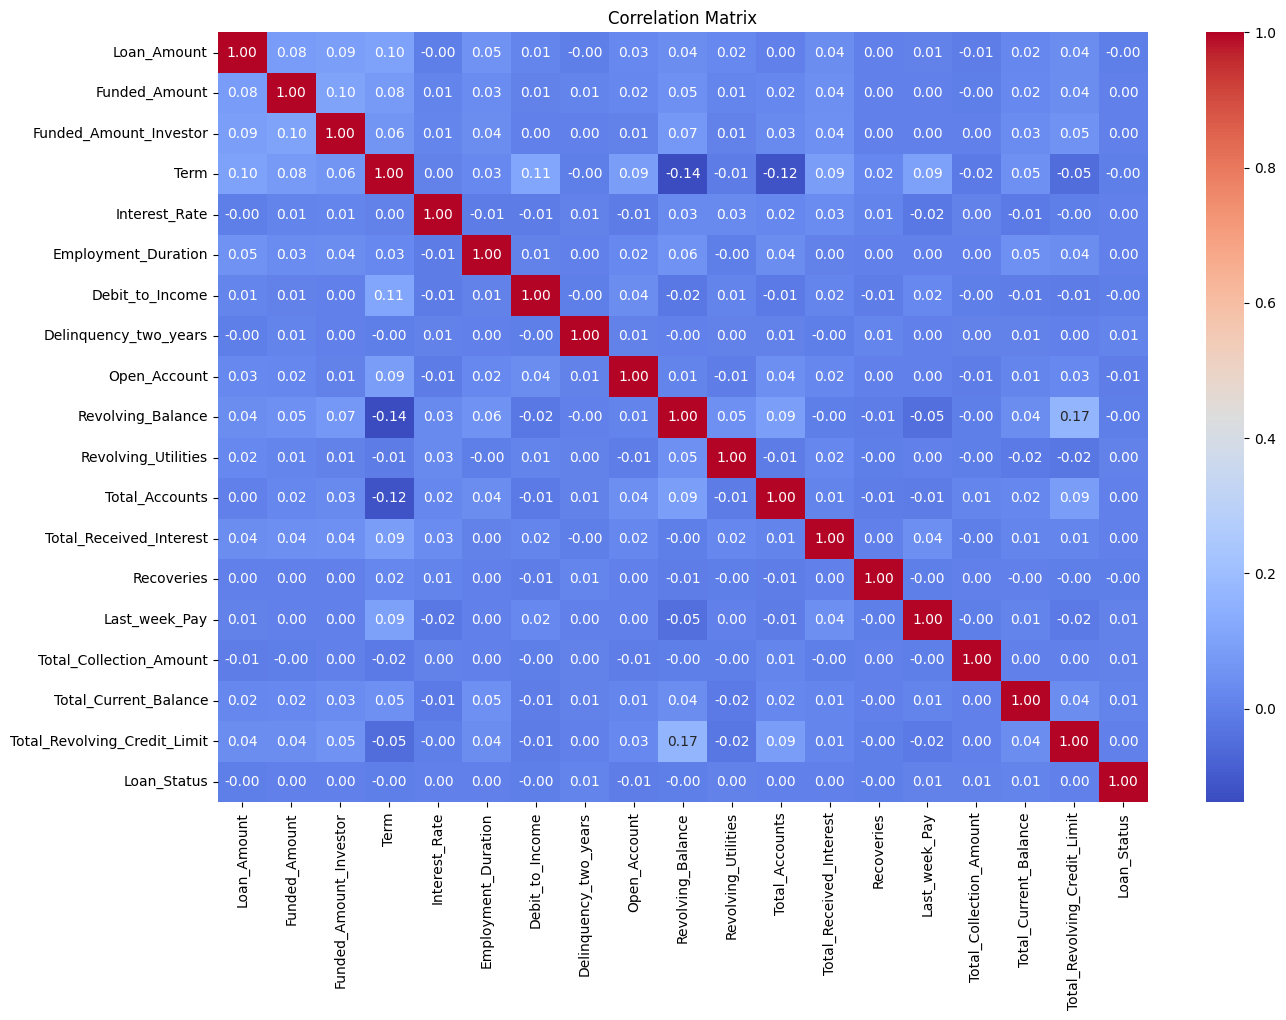

In [75]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Observation

Seems the independent features are not correlated to Target feature

In [76]:
df.columns

Index(['Loan_Amount', 'Funded_Amount', 'Funded_Amount_Investor', 'Term',
       'Interest_Rate', 'Home_Ownership', 'Employment_Duration',
       'Verification_Status', 'Debit_to_Income', 'Delinquency_two_years',
       'Open_Account', 'Revolving_Balance', 'Revolving_Utilities',
       'Total_Accounts', 'Initial_List_Status', 'Total_Received_Interest',
       'Recoveries', 'Last_week_Pay', 'Total_Collection_Amount',
       'Total_Current_Balance', 'Total_Revolving_Credit_Limit', 'Loan_Status'],
      dtype='object')

# Applying Box plot on the Categorical features

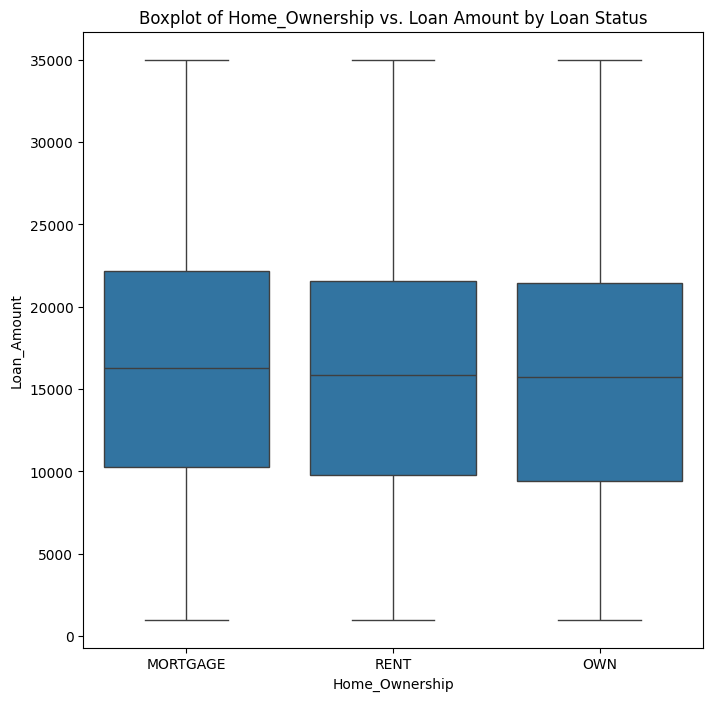

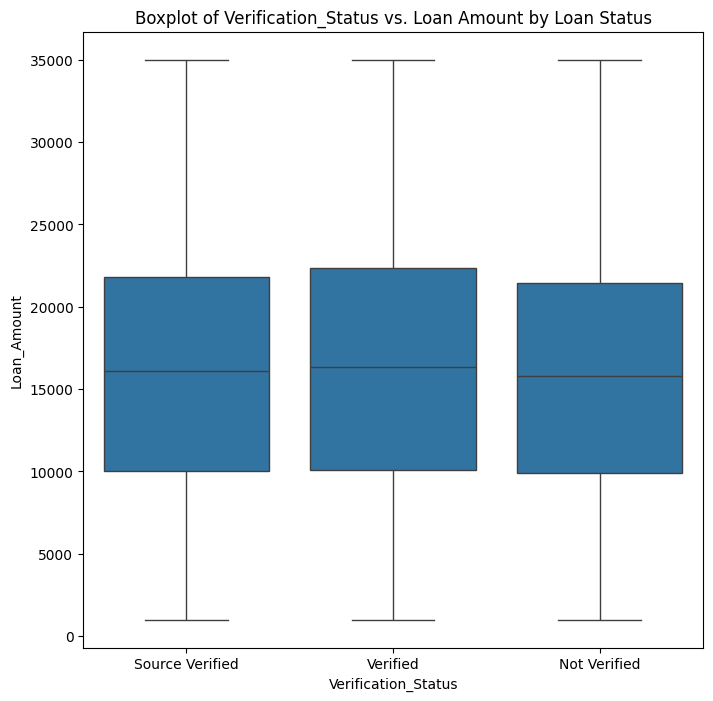

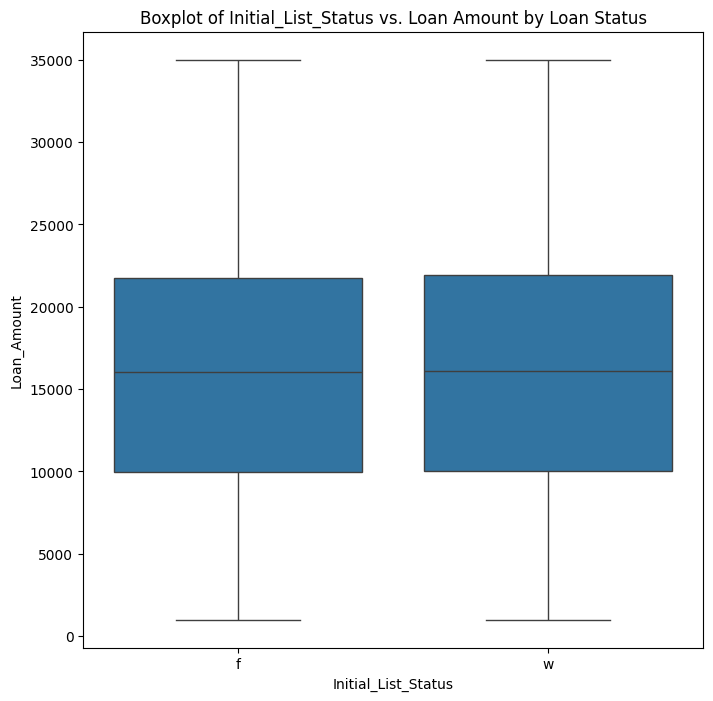

In [77]:
for feature in categorical_columns:
    plt.figure(figsize=(8, 8))
    sns.boxplot(x=feature, y='Loan_Amount', data=df)
    plt.title(f'Boxplot of {feature} vs. Loan Amount by Loan Status')
    plt.show()

# Observation

There is No outliers detects in the distribution between the Loan_Amount and the Categorical features


From the distribution of numerical columns,
Seems that the dataset is not normally distributed hence transforming it to ND data by applying "BOXCOX"

The BoxCox transformation is a statistical tool that transforms non-normal data into a normal distribution. This transformation can improve the accuracy of predictions

In [224]:
# Performing Boxcox tranformation on the dummy data

# This Box cox will return 2 outputs - TRANSFORMED data and the LAMBDA value of the original data
# The lambda_value indicates the transformation parameter chosen by the optimization process, and transformed_data is the resulting transformed dataset

from scipy.stats import boxcox

dummy = df.copy()

for column in numerical_columns:

    # Adding 1 to avoid issues with zero or negative values
    dummy[column], lambda_val = boxcox(dummy[column] + 1)

    print("Lambda value:", lambda_val)


Lambda value: 0.5214633075918993
Lambda value: -0.023434018955006942
Lambda value: -0.11765371823053447
Lambda value: 0.3630717432874214
Lambda value: -0.23046025414283228
Lambda value: 0.5636359398524878
Lambda value: -0.6582690913688067
Lambda value: 0.23085717519499271
Lambda value: 1.045626322477206
Lambda value: 0.5734370741832997
Lambda value: 0.11689268093713985
Lambda value: 0.3440701460868932
Lambda value: 0.5251965516638317
Lambda value: 0.10112847154259243
Lambda value: 0.18342141263572848
Lambda value: 0.17815406023654162


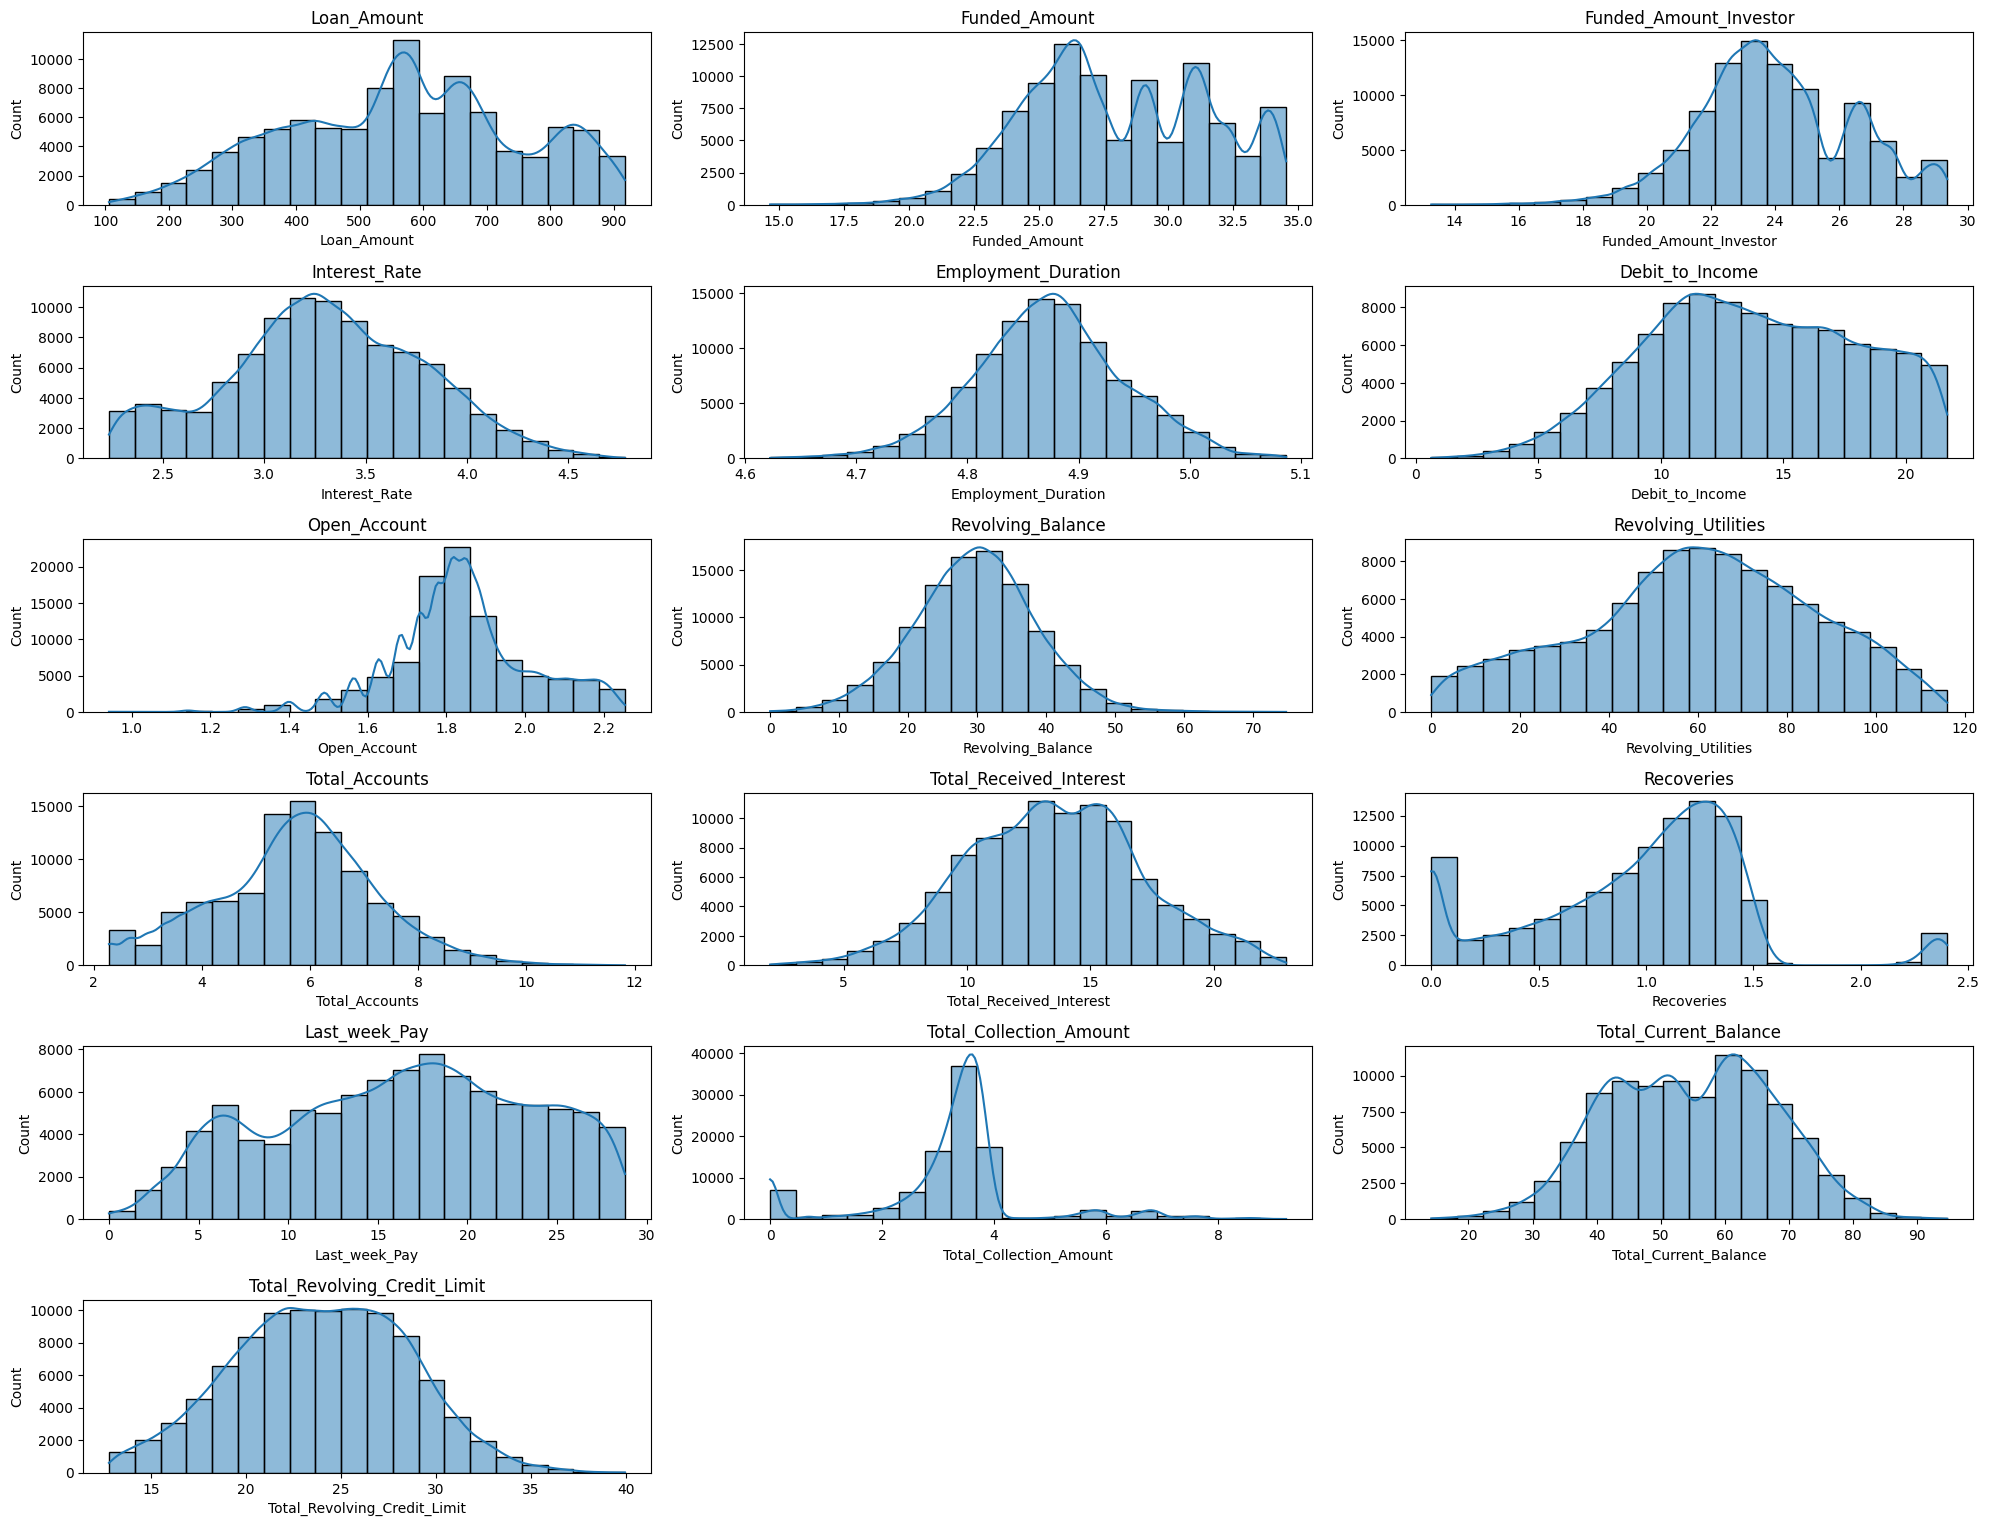

In [78]:
from scipy.stats import boxcox


# Seperating some useful numerical features
numerical_columns = ['Loan_Amount', 'Funded_Amount', 'Funded_Amount_Investor', 'Interest_Rate', 'Employment_Duration',
       'Debit_to_Income', 'Open_Account', 'Revolving_Balance', 'Revolving_Utilities','Total_Accounts', 'Total_Received_Interest',
       'Recoveries', 'Last_week_Pay', 'Total_Collection_Amount','Total_Current_Balance', 'Total_Revolving_Credit_Limit']


# Creating a copy to avoid modifying original data
df_transformed = df.copy()


# Apply Box-Cox transformation to each numerical column
for column in numerical_columns:

    # Adding 1 to avoid issues with zero or negative values
    df_transformed[column], _ = boxcox(df_transformed[column] + 1)


# Plot the distribution of the transformed data
plt.figure(figsize=(20, 20))


num_columns = len(df.columns)
num_rows = (num_columns - 1) // 3 + 1


for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df_transformed[column], bins=20, kde=True)
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

# Observation

After performing BoxCox,
Our dataset is normally distributed

In [79]:
df_transformed.head(3)

,Loan_Amount,Funded_Amount,Funded_Amount_Investor,Term,Interest_Rate,Home_Ownership,Employment_Duration,Verification_Status,Debit_to_Income,Delinquency_two_years,...,Revolving_Utilities,Total_Accounts,Initial_List_Status,Total_Received_Interest,Recoveries,Last_week_Pay,Total_Collection_Amount,Total_Current_Balance,Total_Revolving_Credit_Limit,Loan_Status
0,885.797789,26.909093,21.986801,59,3.846737,MORTGAGE,4.869722,Source Verified,15.319474,0,...,63.216567,7.925385,f,14.469881,0.039105,1.515700,3.778512,44.469260,18.143221,0.0
1,586.597916,32.162014,29.206588,59,3.309302,RENT,4.722833,Source Verified,14.529522,0,...,59.870326,6.544748,f,13.717982,1.296934,8.998696,5.972488,63.333414,24.919040,0.0
2,587.893466,25.734590,21.445581,58,3.224101,MORTGAGE,4.953221,Source Verified,14.187033,0,...,75.969538,8.640336,w,15.947144,1.040297,19.276089,2.634722,69.465097,25.970766,0.0


# Converting categorical into numeric values

 Replacing the values in the df_transformed dataframe by converting categorical into numeric

Since the categories in the categorical columns are minimum, manually replacing the categories with some numbers

In [80]:
replacing_values = {
'MORTGAGE': 0,
'RENT': 1,
'OWN': 2,

'Source Verified':1,
'Verified':1,
'Not Verified': 0,

'f':1 ,
'w': 0
}

df_transformed = df_transformed.replace(replacing_values)
df_transformed.shape

(96576, 22)

In [81]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96576 entries, 0 to 96575
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_Amount                   96576 non-null  float64
 1   Funded_Amount                 96576 non-null  float64
 2   Funded_Amount_Investor        96576 non-null  float64
 3   Term                          96576 non-null  int64  
 4   Interest_Rate                 96576 non-null  float64
 5   Home_Ownership                96576 non-null  int64  
 6   Employment_Duration           96576 non-null  float64
 7   Verification_Status           96576 non-null  int64  
 8   Debit_to_Income               96576 non-null  float64
 9   Delinquency_two_years         96576 non-null  int64  
 10  Open_Account                  96576 non-null  float64
 11  Revolving_Balance             96576 non-null  float64
 12  Revolving_Utilities           96576 non-null  float64
 13  T

# Finding Outliers in df_transformed

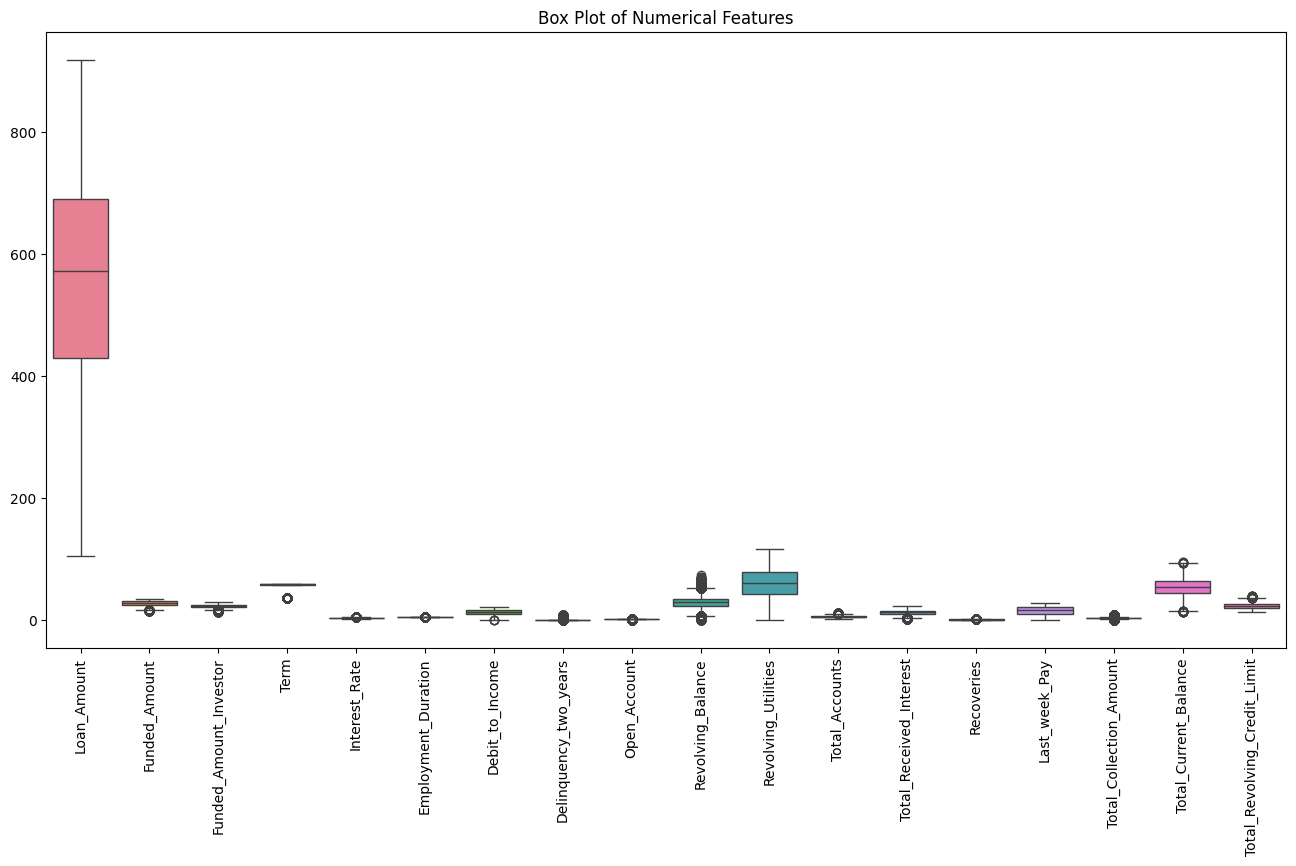

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['Loan_Amount', 'Funded_Amount', 'Funded_Amount_Investor', 'Term', 'Interest_Rate',
                       'Employment_Duration', 'Debit_to_Income', 'Delinquency_two_years', 'Open_Account',
                        'Revolving_Balance', 'Revolving_Utilities', 'Total_Accounts',
                       'Total_Received_Interest', 'Recoveries', 'Last_week_Pay', 'Total_Collection_Amount',
                       'Total_Current_Balance', 'Total_Revolving_Credit_Limit']


plt.figure(figsize=(16, 8))
sns.boxplot(data= df_transformed[numerical_features])
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation= 90)

plt.show()


# Observation
Found that some of the numerical columns have the Outliers.

For treating outliers, applying Winsorizing on the Outliers columns, to reduce the impact of extreme values.

Winsorizing is a technique that clips extreme values to a specified range to reduce their impact on statistical analysis.

In [226]:
import numpy as np
from scipy.stats.mstats import winsorize
from scipy import stats


for column in df:
    df_transformed[column] = winsorize(df_transformed[column], limits=[0.05, 0.05]) # 0.05 is clipping 5% of Outlier data

# Winsorizing is a technique that clips extreme values to a specified range to reduce their impact on statistical analysis.


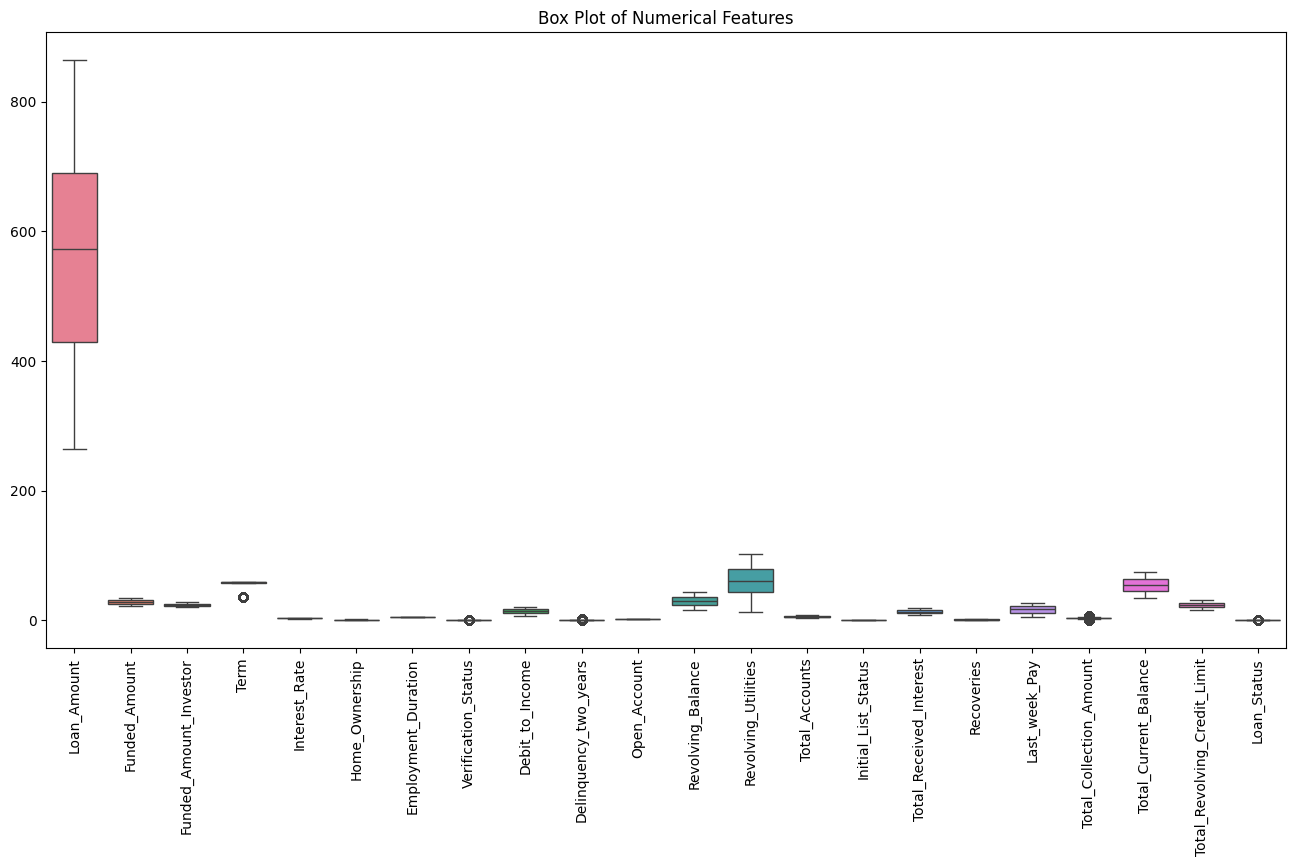

In [227]:
plt.figure(figsize=(16, 8))
sns.boxplot(data= df_transformed)
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation= 90)

plt.show()

# Observation
Most of the Outliers got eliminated from the dataset

In [87]:
# finding Skewness

In [88]:
from scipy.stats import skew

for i in df_transformed.columns:
  print(i, ':', df_transformed[i].skew())



Loan_Amount : -0.09264353734903914
Funded_Amount : -0.022902547625319267
Funded_Amount_Investor : 0.003253337061267963
Term : -3.2798456668582623
Interest_Rate : -0.007536814253039647
Home_Ownership : 0.7808212510310071
Employment_Duration : -0.005730270222667085
Verification_Status : -1.1831014077936444
Debit_to_Income : -0.07635089952985487
Delinquency_two_years : 4.554208185174227
Open_Account : -0.0185395316694783
Revolving_Balance : 0.01797396495755788
Revolving_Utilities : -0.1930131180707047
Total_Accounts : -0.002768998949818542
Initial_List_Status : 0.16494935695682295
Total_Received_Interest : -0.011010100489395418
Recoveries : -0.08818222348007013
Last_week_Pay : -0.1668781205573837
Total_Collection_Amount : -0.02904297280951656
Total_Current_Balance : -0.04612647273507148
Total_Revolving_Credit_Limit : -0.02316558113575463
Loan_Status : 2.8113725539470447


# Observation
After performing BoxCox and Winsorizing,
most of the skewdata got normalized

# Model Building
 Now we have preprocessed our train and test dataset by treating Outliers, null values, finding distribution between various variables and Now we do the split of train and test data again

In [84]:
# recreating the Training and testing dataframe

In [90]:
train_df = df_transformed.iloc[:train_len, :]
test_df = df_transformed.iloc[train_len: , :]

In [94]:
print(train_df.shape)
train_df.tail(3)

(67563, 22)


,Loan_Amount,Funded_Amount,Funded_Amount_Investor,Term,Interest_Rate,Home_Ownership,Employment_Duration,Verification_Status,Debit_to_Income,Delinquency_two_years,...,Revolving_Utilities,Total_Accounts,Initial_List_Status,Total_Received_Interest,Recoveries,Last_week_Pay,Total_Collection_Amount,Total_Current_Balance,Total_Revolving_Credit_Limit,Loan_Status
67560,691.174977,28.891229,26.924095,59,3.400599,0,4.811901,1,12.351373,0,...,83.453793,2.280556,1,14.313084,0.721327,19.276089,2.806939,39.606523,19.321296,0.0
67561,205.253413,31.551084,24.917486,59,3.484480,1,4.897712,0,9.955006,1,...,84.521145,6.065649,0,14.856762,1.188109,13.368343,3.346244,69.099820,20.221641,0.0
67562,540.396956,23.715606,23.158391,59,3.109845,0,4.807614,1,12.829387,1,...,48.333203,7.270341,0,11.725830,0.977074,3.076840,3.620744,73.383714,27.065556,0.0


In [93]:
print(test_df.shape)
test_df.head(3)

(29013, 22)


,Loan_Amount,Funded_Amount,Funded_Amount_Investor,Term,Interest_Rate,Home_Ownership,Employment_Duration,Verification_Status,Debit_to_Income,Delinquency_two_years,...,Revolving_Utilities,Total_Accounts,Initial_List_Status,Total_Received_Interest,Recoveries,Last_week_Pay,Total_Collection_Amount,Total_Current_Balance,Total_Revolving_Credit_Limit,Loan_Status
67563,306.887860,34.104156,22.251477,59,3.598784,1,4.917660,0,11.370333,0,...,65.667240,4.083391,0,20.328840,1.219552,6.621422,3.374909,49.071110,25.612860,NaN
67564,565.387003,24.229946,20.435817,59,3.857477,0,4.872714,1,14.219661,0,...,53.147412,6.229586,0,12.404374,1.306807,22.858316,2.906170,69.215867,29.574881,NaN
67565,496.613606,33.582263,27.374440,58,3.184592,2,4.847163,0,15.871452,0,...,48.543769,4.761919,0,10.447955,1.144503,17.214075,3.642033,59.018325,14.582070,NaN


In [84]:
# Convert Loan_Status column to integer whichis currently 'float'

In [101]:
train_df.Loan_Status = train_df.Loan_Status.astype(int)


In [102]:
train_df.Loan_Status.value_counts()

0    61308
1     6255
Name: Loan_Status, dtype: int64

# Input Splits

In [103]:

X = train_df.drop('Loan_Status', axis = 1)
y = train_df['Loan_Status']


<Axes: >

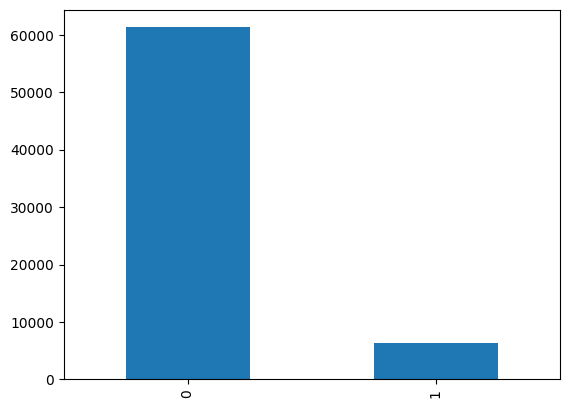

In [104]:
# Finding Distribution in the Target variable
train_df['Loan_Status'].value_counts().plot(kind='bar')

# Observation
As Expected, There is an huge imbalance in the dataset.
We treat this imbalance using SMOTE (Synthetic Minority Over-sampling TEchnique) by creating synthetic datapoints between the neighbours in the minoity class

In [106]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
resampled_X, resampled_y = smote.fit_resample(X, y)


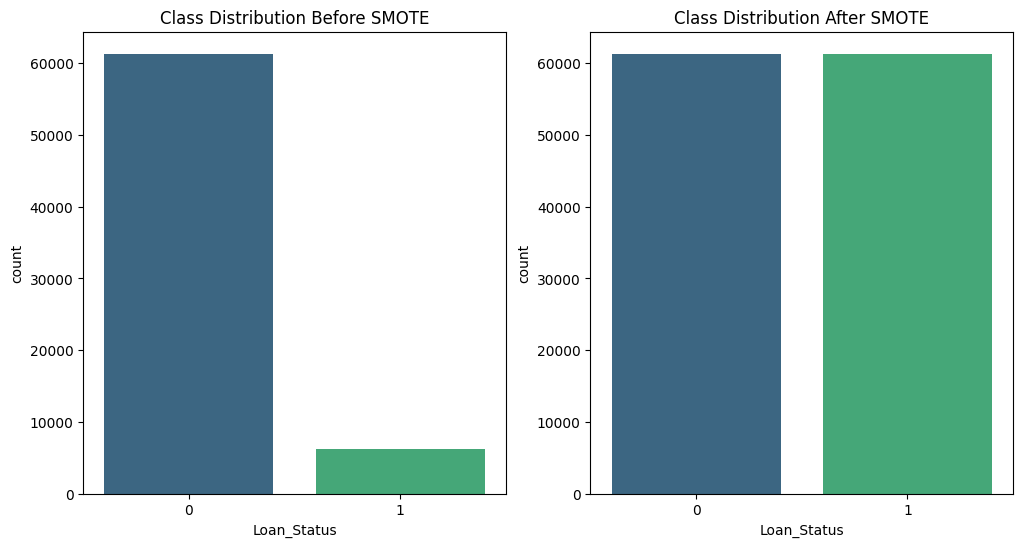

In [107]:
# Plot the distribution before and after SMOTE

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x = y, palette='viridis')
plt.title('Class Distribution Before SMOTE')

plt.subplot(1, 2, 2)
sns.countplot(x= resampled_y, palette='viridis')
plt.title('Class Distribution After SMOTE')

plt.show()

# Performing Train Test Split

In [181]:
from sklearn.model_selection import train_test_split


# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(resampled_X, resampled_y, test_size=0.2, random_state=42)


In [182]:
X_train.shape

(98092, 21)

In [183]:
y_train.shape

(98092,)

In [184]:
X_test.shape

(24524, 21)

In [185]:
y_test.shape

(24524,)

In [186]:
# Empty list to store the Model names and the Accuracy

Classifier_Models=[]
Accuracy=[]

In [187]:
# importing some Classifier models
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics  import accuracy_score, confusion_matrix, f1_score, roc_auc_score, classification_report

In [188]:
%%time

#LogisticRegression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

param_grid = {'C': [0.01, 0.1, 1]}

grid_search = GridSearchCV(model_lr, param_grid, cv= 3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(" model_lr best params", grid_search.best_params_)

# Test the LogisticRegression model
y_pred = model_lr.predict(X_test)

# Evaluate the performance of the model
acc=accuracy_score(y_test, y_pred)
Classifier_Models.append('LogisticRegression')

Accuracy.append(acc)
print('\n')
acc

 model_lr best params {'C': 1}


CPU times: user 15.9 s, sys: 6.44 s, total: 22.3 s
Wall time: 13.2 s


0.6396591094438101

In [189]:
%%time

#KNeighborsClassifier model
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

param_grid = {'n_neighbors': [3, 5,]}

grid_search = GridSearchCV(model_knn, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(" model_knn best params", grid_search.best_params_)
print('\n')

# Test the KNeighborsClassifier model
y_pred = model_knn.predict(X_test)

# Evaluate the performance of the model
acc=accuracy_score(y_test, y_pred)
Classifier_Models.append('KNeighborsClassifier')

Accuracy.append(acc)
acc

 model_knn best params {'n_neighbors': 3}


CPU times: user 2min 23s, sys: 633 ms, total: 2min 23s
Wall time: 1min 29s


0.8018675583102267

In [190]:
%%time

# Random Forest Classifier model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

param_grid = {'n_estimators': [25, 50, 100], 'max_depth': [5, 10]}

grid_search = GridSearchCV(model_rf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(" model_rf best params", grid_search.best_params_)
print('\n')

# Test the Random Forest Classifier model
y_pred = model_rf.predict(X_test)

# Evaluate the performance of the model
acc=accuracy_score(y_test, y_pred)
Classifier_Models.append('Random Forest Classifier ')

Accuracy.append(acc)
acc

 model_rf best params {'max_depth': 10, 'n_estimators': 100}


CPU times: user 4min 41s, sys: 268 ms, total: 4min 42s
Wall time: 4min 43s


0.8775893002772794

In [191]:
%%time
#AdaBoostClassifier model
model_ab = AdaBoostClassifier()
model_ab.fit(X_train, y_train)

param_grid = { 'n_estimators': [25, 50, 100], 'learning_rate': [0.01, 0.1, 1]}

grid_search = GridSearchCV(model_ab, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(" model_ab best params", grid_search.best_params_)
print('\n')

# Test the AdaBoostClassifier model
y_pred = model_ab.predict(X_test)

# Evaluate the performance of the model
acc=accuracy_score(y_test, y_pred)
Classifier_Models.append('AdaBoostClassifier')

Accuracy.append(acc)
acc

 model_ab best params {'learning_rate': 1, 'n_estimators': 100}


CPU times: user 6min 25s, sys: 455 ms, total: 6min 26s
Wall time: 6min 29s


0.7546077312020878

In [192]:
%%time
#Decision Tree model
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

param_grid = {'max_depth': [None, 10, 20]}

grid_search = GridSearchCV(model_dt, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(" model_dt best params", grid_search.best_params_)
print('\n')

# Test the Decision Tree model
y_pred = model_dt.predict(X_test)

# Evaluate the performance of the model
acc=accuracy_score(y_test, y_pred)
Classifier_Models.append('Decision Tree')
Accuracy.append(acc)
acc

 model_dt best params {'max_depth': None}


CPU times: user 32.1 s, sys: 34.1 ms, total: 32.2 s
Wall time: 32.4 s


0.765372696134399

In [193]:
%%time

#naive_bayes model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

param_grid = { 'var_smoothing': [1e-6, 1e-5] }

grid_search = GridSearchCV(model_nb, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(" model_nb best params", grid_search.best_params_)
print('\n')


# Test the naive_bayes model
y_pred = model_nb.predict(X_test)

# Evaluate the performance of the model
acc=accuracy_score(y_test, y_pred)
Classifier_Models.append('GaussianNB')
Accuracy.append(acc)
acc

 model_nb best params {'var_smoothing': 1e-06}


CPU times: user 406 ms, sys: 976 µs, total: 407 ms
Wall time: 406 ms


0.681821888762029

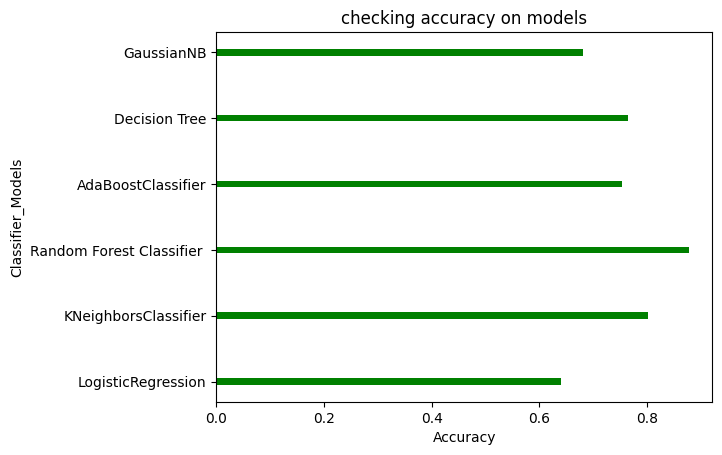

In [194]:
plt.barh(Classifier_Models, Accuracy, height = 0.1, color = "green")

plt.xlabel("Accuracy")
plt.ylabel("Classifier_Models")
plt.title("checking accuracy on models")
plt.show()

# Observation
From this dataset, " RandomForestClassifier " model gives the best accuracy on some Hyper parametric tuning,

hence considering it as the best-performing model with accuracy of 87.75% with best params as {'max_depth': 10, 'n_estimators': 100}

In [195]:
# Creating pickle files to save the trained models in a file

import pickle

#RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, max_depth=10)
model.fit(X_train, y_train)

pickle.dump(model, open('Classification_model_TR.pkl', 'wb'))

In [196]:
from sklearn.metrics import classification_report

# Evaluation metrics
y_pred = model_rf.predict(X_test)

print('confusion_matrix\n',confusion_matrix(y_test, y_pred))
print('\n')
print('accuracy_score',accuracy_score(y_test, y_pred))
print('\n')
print('f1_score',f1_score(y_test, y_pred))
print('\n')
print('roc_auc_score',roc_auc_score(y_test, y_pred))
print('\n')

print("Classification Report:\n", classification_report(y_test, y_pred))


confusion_matrix
 [[11063  1325]
 [ 1677 10459]]


accuracy_score 0.8775893002772794


f1_score 0.8744983277591973


roc_auc_score 0.8774288687949233


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88     12388
           1       0.89      0.86      0.87     12136

    accuracy                           0.88     24524
   macro avg       0.88      0.88      0.88     24524
weighted avg       0.88      0.88      0.88     24524



# Predictions on Test data

In [214]:
test_df.shape

(29013, 21)

In [ ]:
# Dropping Loan_status column from the Test data
test_df = test_df.drop(["Loan_Status"], axis =1)


In [213]:
# create new dataframe to avoid messing in the test data
new = test_df.copy()
new.shape

(29013, 21)

In [199]:
# Using whole training data for our testing purpose

X = train_df.drop('Loan_Status', axis = 1)
y = train_df['Loan_Status']


In [215]:
y.value_counts()  # before resampling

0    61308
1     6255
Name: Loan_Status, dtype: int64

In [203]:
# Performing SMOTE since the target variable is Imbalanced

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
resampled_X, resampled_y = smote.fit_resample(X, y)


In [205]:
resampled_y.value_counts()  # After resampling

0    61308
1    61308
Name: Loan_Status, dtype: int64

In [206]:
# Fitting the resampled data to our best performing model

test_model = RandomForestClassifier(n_estimators=100, max_depth=10)  # n_estimators=100, max_depth=10 is the best parameter for this dataset
test_model.fit(resampled_X, resampled_y)


RandomForestClassifier(max_depth=10)

In [210]:
# new.drop('Predictions', axis=1, inplace = True)

In [217]:
# Make predictions on the preprocessed test data
predictions = test_model.predict(new)

# Assuming you want to add the predictions back to the test dataframe
new['Predictions'] = predictions


In [218]:
new.Predictions.value_counts()  # Our Model predictions on the test data

0    21704
1     7309
Name: Predictions, dtype: int64

In [219]:
new

,Loan_Amount,Funded_Amount,Funded_Amount_Investor,Term,Interest_Rate,Home_Ownership,Employment_Duration,Verification_Status,Debit_to_Income,Delinquency_two_years,...,Revolving_Utilities,Total_Accounts,Initial_List_Status,Total_Received_Interest,Recoveries,Last_week_Pay,Total_Collection_Amount,Total_Current_Balance,Total_Revolving_Credit_Limit,Predictions
67563,306.887860,34.104156,22.251477,59,3.598784,1,4.917660,0,11.370333,0,...,65.667240,4.083391,0,20.328840,1.219552,6.621422,3.374909,49.071110,25.612860,0
67564,565.387003,24.229946,20.435817,59,3.857477,0,4.872714,1,14.219661,0,...,53.147412,6.229586,0,12.404374,1.306807,22.858316,2.906170,69.215867,29.574881,1
67565,496.613606,33.582263,27.374440,58,3.184592,2,4.847163,0,15.871452,0,...,48.543769,4.761919,0,10.447955,1.144503,17.214075,3.642033,59.018325,14.582070,0
67566,320.485118,30.863242,23.596081,59,2.537831,0,4.835788,1,14.686905,1,...,52.844401,5.897043,0,14.109291,1.054350,22.099358,3.722519,51.413413,19.521198,0
67567,837.902655,27.997148,22.360494,59,2.975114,0,4.975061,1,13.848533,0,...,86.512144,5.723391,1,21.021186,0.652948,22.354446,3.152346,33.481541,20.291802,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96571,550.362232,33.012842,24.622004,58,2.666614,2,4.850288,1,14.988394,0,...,27.000802,7.539784,1,16.408422,1.372202,23.963223,2.340281,49.311348,23.250469,0
96572,549.408750,28.471987,24.592628,60,4.071857,0,4.789056,1,16.919434,0,...,50.534610,5.544265,0,8.582695,0.000000,2.606096,0.000000,51.861130,25.344682,0
96573,874.877779,21.624080,27.007526,59,3.276499,0,4.850314,1,10.630936,0,...,98.278648,6.229586,1,16.211767,1.100839,11.431654,3.796432,63.914621,28.941186,0
96574,677.162406,23.610580,23.529844,59,3.407309,0,4.829740,0,12.084960,0,...,21.201092,8.753199,1,13.548223,1.509884,7.999001,2.148785,56.355128,18.605730,0


# Result:

Working on the Loan Default Prediction project taught me about using machine learning to predict loan outcomes.

I learned to analyze data, handle imbalances, and fine-tune models for better accuracy. Exploring the data, cleaning it up, and adjusting model settings were key steps.

Dealing with imbalanced data was a challenge, but it improved my skills. The project emphasized the importance of understanding data for successful machine learning.

From this dataset, " RandomForestClassifier " model gives the best accuracy with some Hyper parametric tuning,

which has a accuracy of 87.75% with best params as {'max_depth': 10, 'n_estimators': 100}

# Thankyou Note

Team,

I wanted to express my gratitude for the opportunity to work on the Loan Default Prediction case study.
It was a challenging yet rewarding experience that allowed me to showcase my skills in machine learning. The project provided valuable insights and sharpened my problem-solving abilities.

Thank you for the chance to demonstrate my capabilities, and I look forward to the possibility of further collaboration.

